In [1]:
import nibabel as nib
import os
import numpy as np
import os.path as op
import seaborn as sns
import matplotlib
import scipy
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [14]:
#preliminary housekeeping
home_dir = '/data/home/iballard/fd/'
subj_file = home_dir + 'subjects.txt'
subs = list(np.loadtxt(subj_file,'string'))
os.chdir(home_dir)

In [15]:
exp = 'sim_4mm-PEdiffone'
smooth = 'smoothed'
masks = ['sim_4mm_striatum_PE_mf_mask','vta']
contrasts = ['PE_mb','PE_mf']

In [16]:
copes = {'sub':[],'mask':[],'contrast':[],'cope':[]}

for m in masks:
    for contrast in contrasts:
        for sub in subs:

            #load ROI
            if m != 'vta':
                mask = op.join(home_dir,'data', sub,  'masks', m + '.nii.gz')
            else:
                mask = op.join(home_dir,'data', sub,  'masks', 'vta','sim_vta_mask.nii.gz')

            mask = nib.load(mask).get_data().astype(bool)
            
            #load stat image
            stat = op.join(home_dir,'analysis', exp, sub, 'ffx', 'epi', 
                               smooth, contrast, 'cope1.nii.gz')
            stat = nib.load(stat).get_data().astype(float)

            #mask
            stat = stat[mask]

            copes['sub'].append(sub)
            copes['mask'].append(m)
            copes['contrast'].append(contrast)
            copes['cope'].append(np.nanmean(stat))
copes = pd.DataFrame(copes)

/home/iballard/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 2; dimension is 54 but corresponding boolean dimension is 57


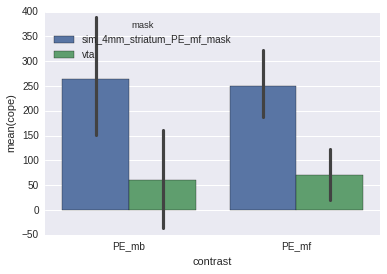

In [17]:
sns.barplot(x='contrast',y='cope',hue='mask',data=copes)

In [19]:
copes = copes.set_index(['contrast','mask'])

In [26]:
scipy.stats.ttest_1samp(copes.loc[('PE_mb','sim_4mm_striatum_PE_mf_mask'),'cope'],0)

Ttest_1sampResult(statistic=4.0436344193201057, pvalue=0.00032353057081772044)

In [28]:
copes.to_csv(home_dir + 'striatum_pe.csv')